Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


Load Dataset

In [2]:
# Load the dataset
file_path = 'SeaMonkey_bugs.csv'  # Update with your actual file path
df = pd.read_csv(file_path)
df.head()

,Summary,Issue id,Status,Priority,Resolution,Created,Resolved,Description
0,Port |Bug 752376 - Avoid calling scrollbox.ens...,1606681,RESOLVED,--,FIXED,2020-01-02 17:14:21+00:00,2020-11-01 20:04:54+00:00,Port the following bug:\n* Bug 752376 - Avoid ...
1,SeaMonkey (Mac) update version 2.49.5 made it ...,1606979,UNCONFIRMED,--,NaN,2020-01-04 02:32:49+00:00,2020-01-05 06:00:56+00:00,User Agent: Mozilla/5.0 (Macintosh; Intel Mac ...
2,"Release Notes: Drop ""Features"" link to Wiki",1607002,NEW,P5,NaN,2020-01-04 12:52:00+00:00,2020-03-08 07:36:18+00:00,AFAIK there has never been useful contents on ...
3,Port |Bug 822068 - The content loses focus aft...,1607025,RESOLVED,--,FIXED,2020-01-04 17:10:43+00:00,2020-11-01 20:06:26+00:00,Port the following to SeaMonkey:\n* Bug 822068...
4,rss folder management buggy,1607173,UNCONFIRMED,--,NaN,2020-01-06 12:04:04+00:00,2020-01-09 07:21:32+00:00,User Agent: Mozilla/5.0 (Windows NT 10.0; Win6...


Distribution of Key Attributes (Status, Priority, Resolution)

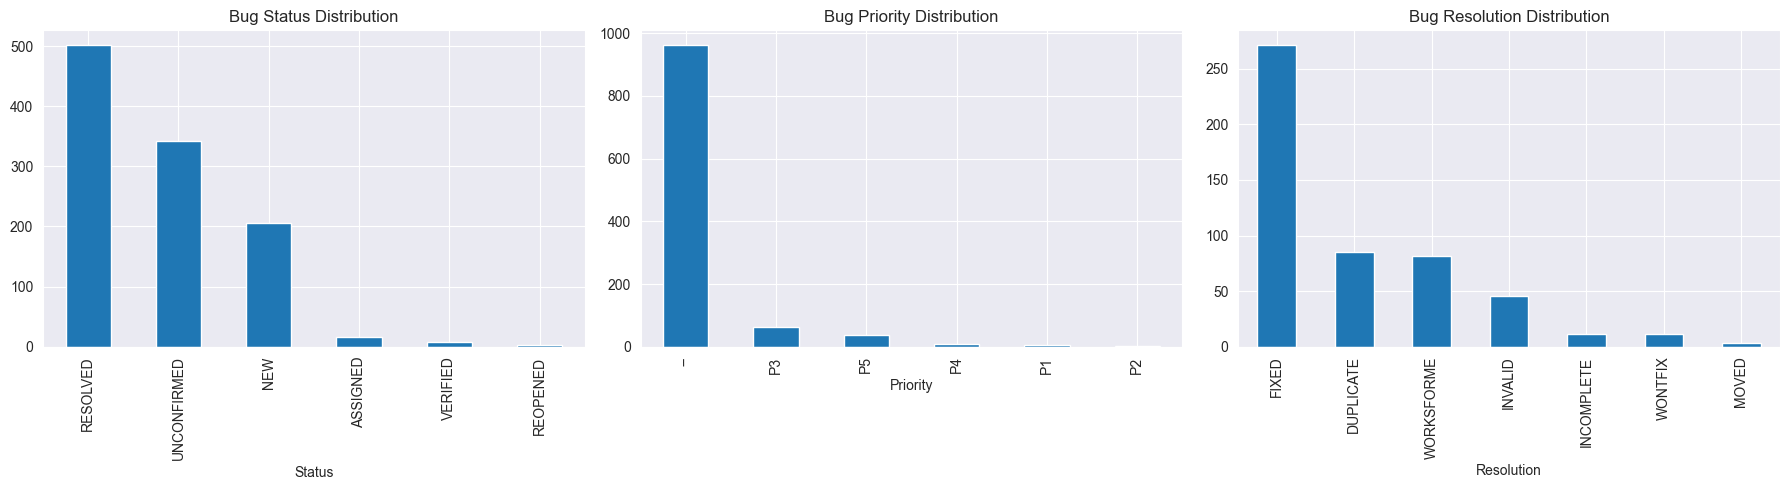

In [3]:
# Count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bug Status Distribution
df['Status'].value_counts().plot(kind='bar', ax=axes[0], title='Bug Status Distribution')

# Bug Priority Distribution
df['Priority'].value_counts().plot(kind='bar', ax=axes[1], title='Bug Priority Distribution')

# Bug Resolution Distribution
df['Resolution'].value_counts().plot(kind='bar', ax=axes[2], title='Bug Resolution Distribution')

plt.tight_layout()
plt.show()


Temporal Analysis - Bug Reports Over Time

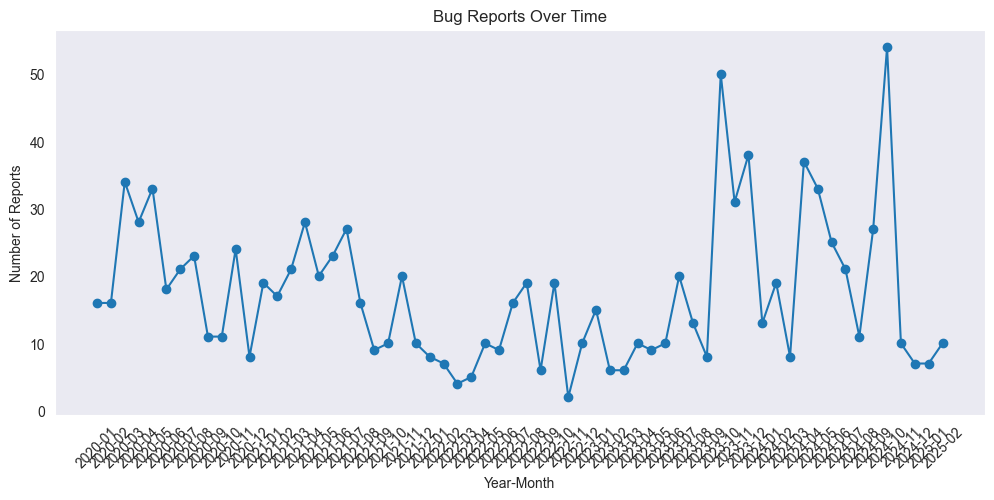

In [4]:
# Convert date columns
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')

# Extract year-month
df['Created_YearMonth'] = df['Created'].dt.tz_localize(None).dt.to_period('M')
# df['Created_YearMonth'] = df['Created'].dt.to_period('M')

# Count bug reports per month
bug_report_trend = df['Created_YearMonth'].value_counts().sort_index()

# Plot bug report trends
plt.figure(figsize=(12, 5))
plt.plot(bug_report_trend.index.astype(str), bug_report_trend.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Bug Reports Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reports')
plt.grid()
plt.show()


Resolution Time Analysis

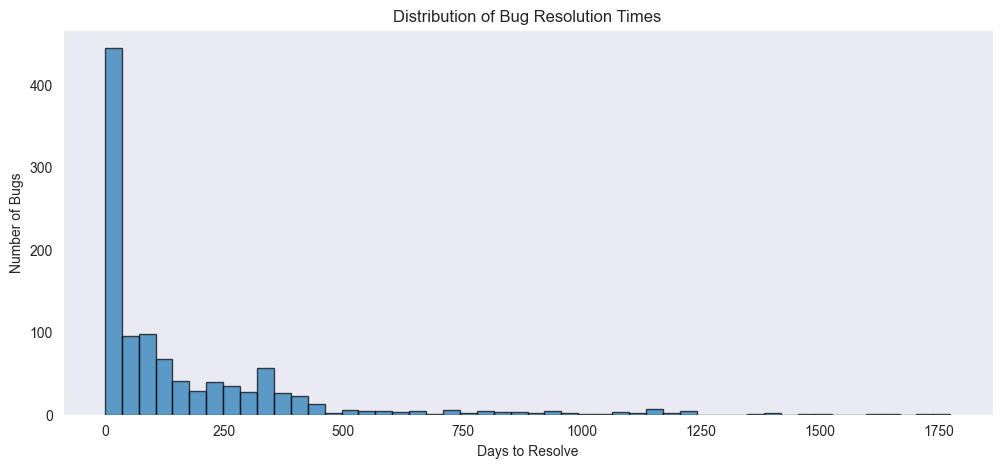

In [5]:
# Calculate resolution time
df['Resolution_Time'] = (df['Resolved'] - df['Created']).dt.days

# Plot distribution
plt.figure(figsize=(12, 5))
plt.hist(df['Resolution_Time'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bug Resolution Times')
plt.xlabel('Days to Resolve')
plt.ylabel('Number of Bugs')
plt.grid()
plt.show()


Word Cloud for Bug Descriptions
python
Copy
Edit


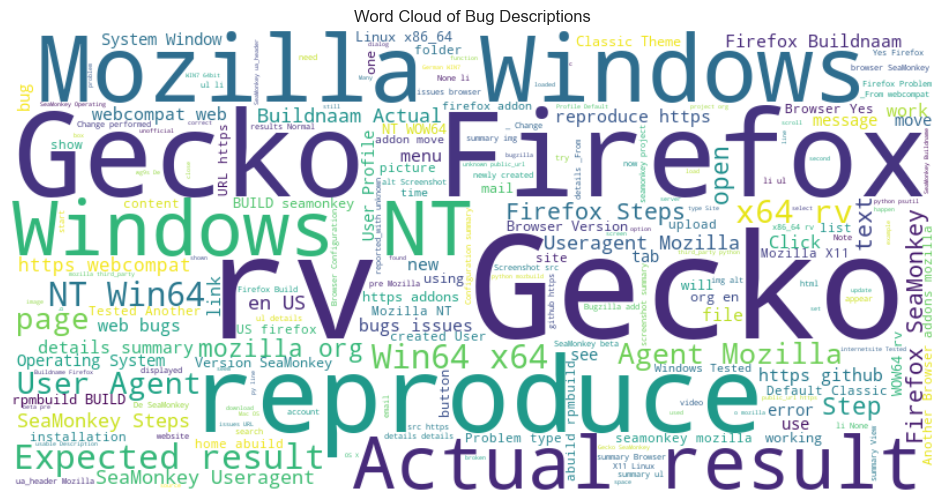

In [6]:
# Word Cloud for bug descriptions
text_data = ' '.join(str(desc) for desc in df['Description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bug Descriptions')
plt.show()


Priority Vs Resolution


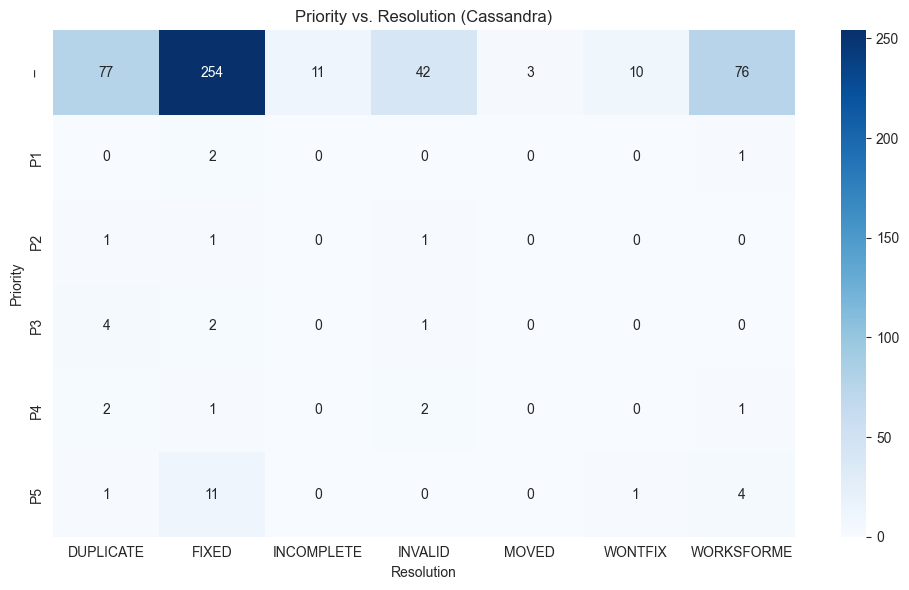

In [7]:
plt.figure(figsize=(10, 6))
priority_resolution = pd.crosstab(df["Priority"], df["Resolution"])
sns.heatmap(priority_resolution, annot=True, fmt="d", cmap="Blues")
plt.title("Priority vs. Resolution (Cassandra)")
plt.tight_layout()
plt.show()